In [2]:
!pip install xgboost
!pip install missingno
!pip install scikit-learn

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import simplefilter
simplefilter("ignore")
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
train=pd.read_csv('C:/Users/DELL/Desktop/RT_IOT2022.csv')

In [5]:
print(train.shape)

(123117, 85)


In [6]:
train.head()

,Unnamed: 0,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [7]:
target='Attack_type'
print(train['Attack_type'].unique())

['MQTT_Publish' 'Thing_Speak' 'Wipro_bulb' 'ARP_poisioning'
 'DDOS_Slowloris' 'DOS_SYN_Hping' 'Metasploit_Brute_Force_SSH'
 'NMAP_FIN_SCAN' 'NMAP_OS_DETECTION' 'NMAP_TCP_scan' 'NMAP_UDP_SCAN'
 'NMAP_XMAS_TREE_SCAN']


In [8]:
train.duplicated().sum()

0

In [9]:
categorical_columns = train.select_dtypes(include=['object']).columns

for column in categorical_columns:
    print(column)
    print(train[column].value_counts())
    print("----------------------------")

proto
proto
tcp     110427
udp      12633
icmp        57
Name: count, dtype: int64
----------------------------
service
service
-         102861
dns         9753
mqtt        4132
http        3464
ssl         2663
ntp          121
dhcp          50
irc           43
ssh           28
radius         2
Name: count, dtype: int64
----------------------------
Attack_type
Attack_type
DOS_SYN_Hping                 94659
Thing_Speak                    8108
ARP_poisioning                 7750
MQTT_Publish                   4146
NMAP_UDP_SCAN                  2590
NMAP_XMAS_TREE_SCAN            2010
NMAP_OS_DETECTION              2000
NMAP_TCP_scan                  1002
DDOS_Slowloris                  534
Wipro_bulb                      253
Metasploit_Brute_Force_SSH       37
NMAP_FIN_SCAN                    28
Name: count, dtype: int64
----------------------------


In [10]:
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# Initialize LabelEncoder
label_encoder = LabelEncoder()
# Delete the target label column and the id classification column for the train data
X = train.drop(columns=['Attack_type'])
X.drop(columns=['Unnamed: 0', 'id.orig_p', 'id.resp_p'], inplace=True)
# encode input for non-numeric columns
X['proto'] = label_encoder.fit_transform(X['proto'])
X['service'] = label_encoder.fit_transform(X['service'])
y = label_encoder.fit_transform(train[target])
# Divide the data into training set and test set              
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
gbm = GradientBoostingClassifier(n_estimators=100, max_depth=3, learning_rate=0.1, random_state=42)


In [12]:
# Train the model
gbm.fit(X_train, y_train)

# Make predictions
y_pred = gbm.predict(X_test)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1578
           1       0.88      0.87      0.87       100
           2       1.00      1.00      1.00     18897
           3       1.00      1.00      1.00       871
           4       0.83      0.83      0.83         6
           5       0.67      0.67      0.67         3
           6       1.00      1.00      1.00       393
           7       1.00      1.00      1.00       220
           8       0.97      0.97      0.97       489
           9       1.00      0.99      1.00       384
          10       0.99      0.98      0.98      1625
          11       1.00      0.95      0.97        58

    accuracy                           1.00     24624
   macro avg       0.94      0.94      0.94     24624
weighted avg       1.00      1.00      1.00     24624

--------------------------------------------------
[[ 1555     4     0     0     0     0     0     0     2     0    17     0]
 [    0

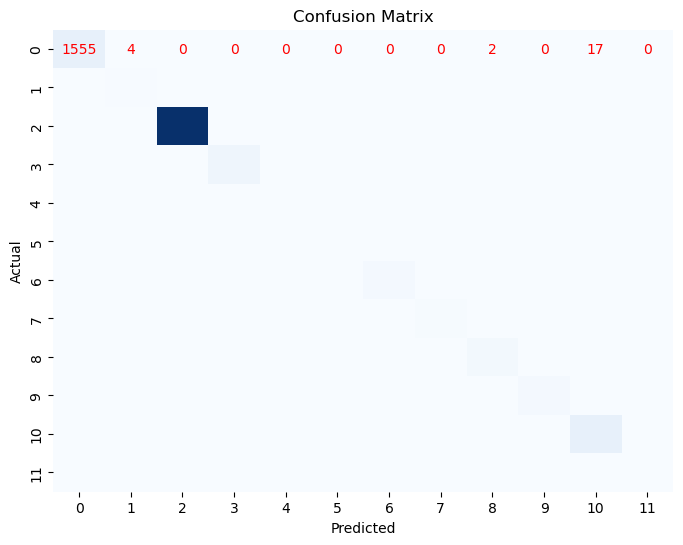

In [14]:
# Evaluate model performance
classification_rep = classification_report(y_test, y_pred)
#print("Classification Report for", name)
print(classification_rep)
print("--------------------------------------------------")
cm = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(8, 6))
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
for text in ax.texts:
    text.set_color("red")  # Set all text colors to red for visibility
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()